# Part 2: NOTEBOOK: KNOWLEDGE EXTRACTION (50 marks)

**Reminder:** For each notebook, you must submit your notebook with all the cells executed, from start to finish, in a fresh run (i.e., first cell number should be [1], second [2], etc.). You can achieve this by selecting Kernel -> Restart and run all. 


## Table of contents<a class='anchor' id='top'></a>
- [Imports](#0)
- [Part 2a: Data Analysis and Preprocessing](#1)
  1. [Data Analysis (15 marks)](#11)
  2. [General Data Preprocessing (10 marks)](#12)
- [Part 2b: Machine Learning](#2)
  1. [ML-Specific Data Preprocessing (10 marks)](#21)
  2. [Machine Learning (15 marks)](#22)
- [Cleanup](#3)

## Imports <a class="anchor" id="0"></a>

Add all import statements in the following code block. You are only allowed to use libraries that have been introduced in the module. 

In [1]:
# add your import statements here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


## Part 2a: Data Analysis <a class="anchor" id="1"></a>

In this part, you will work with data from the US Behavioral Risk Factor Surveillance System (BRFSS) that is given in the file <span style="color:green">brfss2013_cmt655.csv</span>. The goal is to build a prediction model that predicts mental health problems such as stress, depression, and problems with emotions. The target feature will be derived from the MENTHLTH variable that indicates for how many days during the last 30 days the mental health of an individual was not good. A description of all variables and their values can be found in the file <span style="color:green">codebook.pdf</span>.

### 1. Data Analysis <a class="anchor" id="11"></a>

Look up the meaning of the 36 features in the codebook and use numerical and/or visualization methods to get an overview of the available data. Be efficient. Focus on simplicity, comprehensibility and avoid redundancy.

In [2]:
# add your code here (use additional cells to improve documentation and readability)
df = pd.read_csv("brfss2013_cmt655.csv")

# Function for replacing the special codes in the next cell
def replace_codes(df, column, codes_dict):
    df[column] = df[column].replace(codes_dict)
    return df


/var/folders/1x/jd5z26n95f5cp57xyfhcd07m0000gn/T/ipykernel_77734/1318816402.py:2: DtypeWarning: Columns (33,34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("brfss2013_cmt655.csv")


In [3]:
# ========== Data Cleaning ==========
# Replace special codes with NaN or meaningful values 
# For example for menthlth the special codes are: 77 = "Don't Know", 99 = "Refused", 88 = "None"

df = replace_codes(df, 'menthlth', {77: np.nan, 88: 0, 99: np.nan})
df = replace_codes(df, 'sleptim1', {77: np.nan, 99: np.nan})
df = replace_codes(df, 'income2', {77: np.nan, 99: np.nan})
df = replace_codes(df, 'menthlth', {77: np.nan, 99: np.nan})
df = replace_codes(df, 'employ1', {9: np.nan})
df = replace_codes(df, 'marital', {9: np.nan})

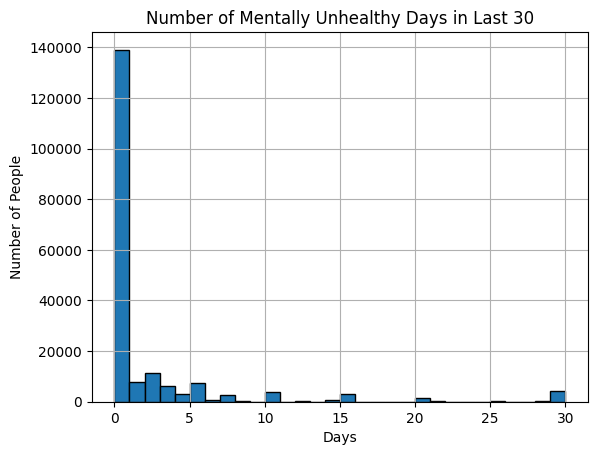

In [4]:
# ========== Plot 1: Distribution of Mentally Unhealthy Days ==========
# Plot histogram showing self reported number of mentally unhealthly days in the last 30 days

plt.hist(df['menthlth'], bins=30, edgecolor='black')
plt.title('Number of Mentally Unhealthy Days in Last 30')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

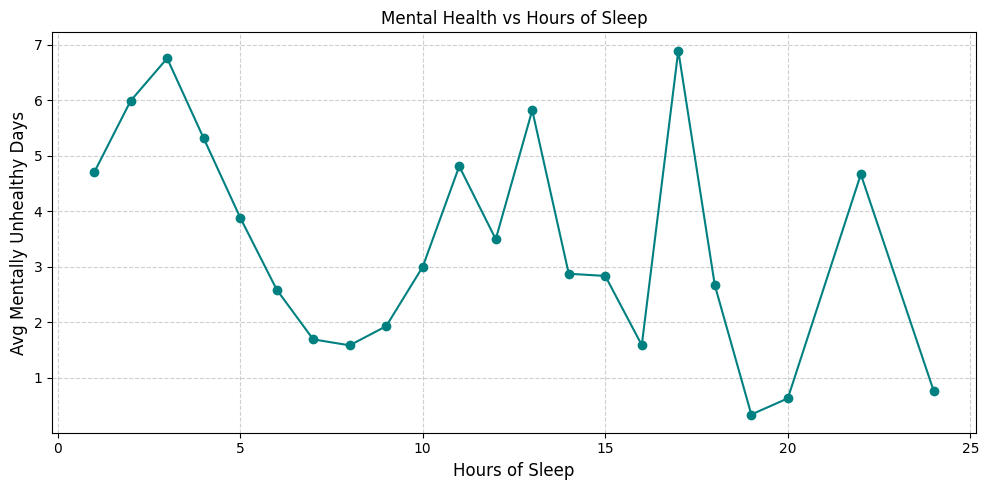

In [5]:
# ========== Plot 2: Avg Mentally Unhealthy Days by Hours of Sleep ==========
# Group by hours of sleep (sleptim1) and calculate the mean number of mentally unhealthy days (menthlth)
sleep_mental = df.groupby('sleptim1')['menthlth'].mean()

# Line plot showing relationship between sleep duration and mental health
plt.figure(figsize=(10, 5))
plt.plot(sleep_mental.index, sleep_mental.values, marker='o', linestyle='-', color='teal')
plt.title('Mental Health vs Hours of Sleep', fontsize=12)
plt.xlabel('Hours of Sleep', fontsize=12)
plt.ylabel('Avg Mentally Unhealthy Days', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

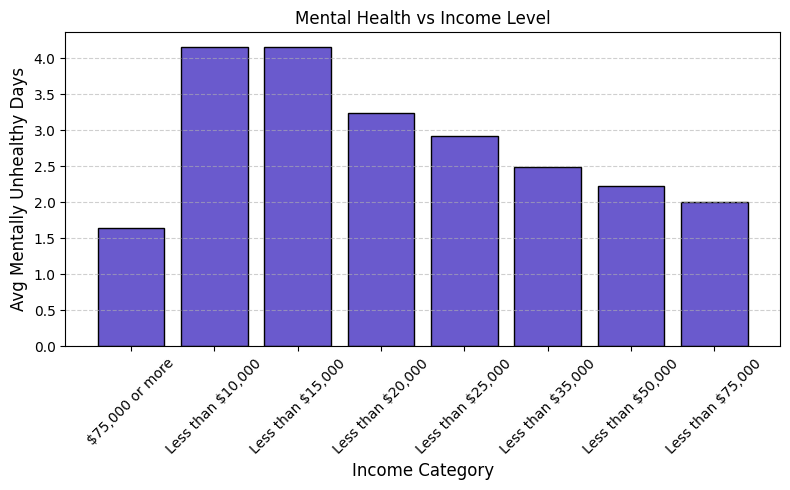

In [6]:
# ========== Plot 3: Mental Health by Income Category ==========
# Group by income level (income2) and calculate the mean number of mnetally unhealthy days (menthlth)
income_mental = df.groupby('income2')['menthlth'].mean()

# Bar chart showing relationship between income level and mental health
plt.figure(figsize=(8, 5))
plt.bar(income_mental.index.astype(str), income_mental.values, color='slateblue', edgecolor='black')
plt.title('Mental Health vs Income Level', fontsize=12)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Avg Mentally Unhealthy Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

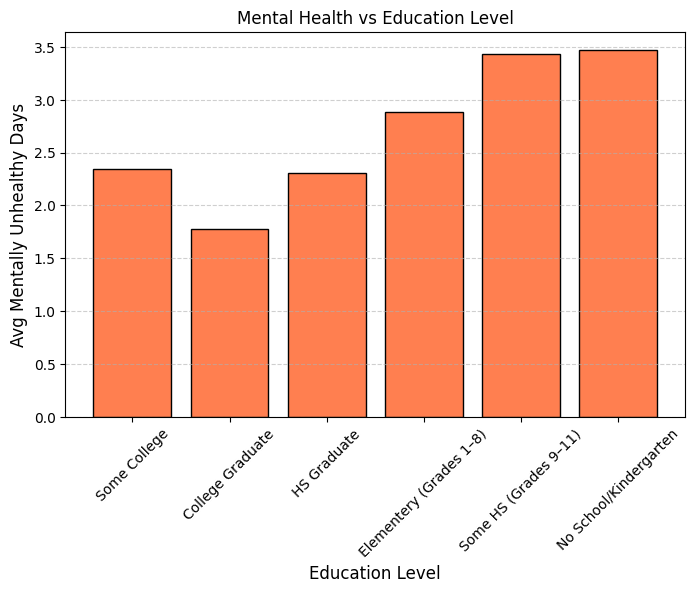

In [7]:

# ========== Plot 4: Mental Health by Education Level ==========
# Group by education level (educa) and calculate the mean number of mentally unhealthy days (menthlth)
education_mental = df.groupby('educa')['menthlth'].mean()

# Map the long education categories to shorter labels for better readability in the plot 
education_label_short = {
    'Never attended school or only kindergarten': 'No School/Kindergarten',
    'Grades 1 through 8 (Elementary)': 'Elementery (Grades 1–8)',
    'Grades 9 though 11 (Some high school)': 'Some HS (Grades 9–11)',
    'Grade 12 or GED (High school graduate)': 'HS Graduate',
    'College 1 year to 3 years (Some college or technical school)': 'Some College',
    'College 4 years or more (College graduate)': 'College Graduate'
}

# Apply the shorter labels
education_mental.index = education_mental.index.map(education_label_short)

# Bar chart showing relationship between education level and mental health
plt.figure(figsize=(8, 5))
plt.bar(education_mental.index.astype(str), education_mental.values, color='coral', edgecolor='black')
plt.title('Mental Health vs Education Level', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Avg Mentally Unhealthy Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

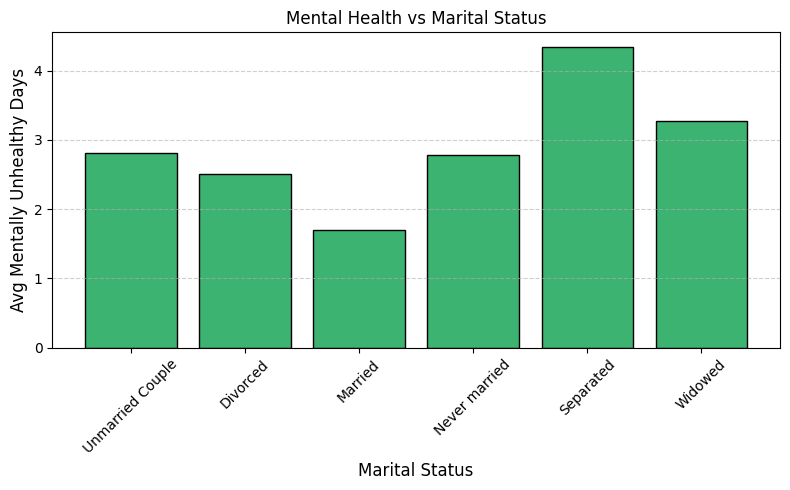

In [8]:
# ========== Plot 5: Mental Health by Marital Status ==========
# Group by marital status (marital) and calculate the mean number of mentally unhealthy days (menthlth)
marital_mental = df.groupby('marital')['menthlth'].mean()

# Shorten the long lebel for better readability in the plot
marital_mental.index = marital_mental.index.str.replace(
    'A member of an unmarried couple', 'Unmarried Couple'
)

# Bar chart showing relationship between marital status  and mental health
plt.figure(figsize=(8, 5))
plt.bar(marital_mental.index.astype(str), marital_mental.values, color='mediumseagreen', edgecolor='black')
plt.title('Mental Health vs Marital Status', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Avg Mentally Unhealthy Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Discussion:** Discuss your findings. What did you learn about the variables? You can summarize variables for which you made similar observations to make the discussion more efficient. Your discussion should be concise and to the point. Confusing digressions will result in point deduction.

**Findings:**

* **Mental Health** - the results show that an overwhelming amount of people had 0 mentally unhealthly days compared to the rest of the data. This is shown with a sharp peak at 0 days in the histogram. Although this made the graph skewed, it provides a truthful represtation of the data and shows that the majority of individuals reported 0 mental health days.

* **Sleep** - the results show that individuals with very low (< 5 hours) or very high (> 9 hours) sleep tend to have more mentally unhealthy days. Interestingly, there are some expections to this trend as people with 19 - 20 hours of sleep, had the least mentally unhealthy days. However, given the unrealistic nature of this, these will be considered as anomalies and could involve other issues like sleeping or mental health disorders, which requires further analysis. Therefore, the best mental health was shown with individuals who have around 7 - 8 hours of sleep, wheres those with extremely high sleep (17 hours), reported the most mentally unhealthly days.

* **Income & Education** - the results show that the lower income groups have more mentally unhealthy days. As the income increased, the average number of mentally unhealthy days also decreased. The same is true for participants with higher education (like college and high school graduates) compared to people with lower education levels. Clearly, this indicates a strong negative correlation between income and mental health.Similarly, higher levels of education tend to associate with better mental health. Also, it highlights the  advantagous effect of a higher education, as individuals with better education may have access to better job opportunites, and therefore a high income.

* **Marital Status** - the results show that married individuals generally have less mentally unhealthy days compared to those seperated, divorced or widowed. This indicates that being married is correlated with having better mental health.


### 2. General Data Preprocessing <a class="anchor" id="12"></a>

Create a dataset from the BRFSS data with 10 - 15 variables that allows you to build a model that predicts mental health problems (Feature menthlth). You can drop colums and rows, replace values and create new features as you deem fit. The resulting dataset should not contain any missing values.

In [9]:
# add your code here (use additional cells to improve documentation and readability)
 
# ========== Data Cleaning ==========
# Replace special codes with NaN or meaningful values 

df = replace_codes(df, 'children', {88: 0, 99: np.nan})
df = replace_codes(df, 'smokday2', {7: np.nan, 9: np.nan})
df = replace_codes(df, 'alcday5', {777: np.nan, 88: 0, 999: np.nan})
df = replace_codes(df, 'exerany2', {7: np.nan, 9: np.nan})
df = replace_codes(df, 'avedrnk2', {77: np.nan, 99: np.nan})


In [10]:
# ========== Feature Engineering ==========
# Create a new feature 'total_alcohol_consumption' by multiplying drinking days by average drinks

df['total_alcohol_consumption'] = df['alcday5'] * df['avedrnk2']

In [11]:
# ========== Data Preprocessing ==========
# Drop rows with missing values for the selected features

model_df = df[['menthlth', 'sleptim1', 'income2', 'educa', 'employ1', 'marital','children', 'smokday2', 'exerany2', 'total_alcohol_consumption']].dropna()

# print(model_df.isnull().sum()) - check no missing values


**Discussion:** Discuss the design of your dataset. What are your features and why did you choose/create them? Why did you exclude particular features/instances? What are possible limitations of your dataset? Your discussion should be concise and to the point. Confusing digressions will result in point deduction.

**Features Chosen**

1. **Mental Health** - this is the target variable in the dataset and shows the number of mentally unhealthy days a person has reported in the past 30 days.
2. **Sleep** - mental health is often linked to how much sleep a person gets and often less or too much sleep than optimal is the main factor towards a persons mental health.
3. **Income** - I chose to use income in the dataset as lower income individuals are often more likely to experience mental health issues. This will help cover the economic impacts of life on mental health.
4. **Education** - I chose to use education as higher educated individuals tend to have less mental health issues, possibly due to the average income being higher the more the person is educated.
5. **Employment** - I chose to include employment status as a feature as a persons job status is heavily linked to mental health. Employed individuals tend to have a more stable income source and access to better health which improves mental health. This helps cover the job related impacts of a persons mental health.
6. **Marital Status** - I chose this for the dataset as people often correlate their mental health based on how well their relationship / marriage is going. It is useful to see the impact a healthy relationship / marriage has on mental health.
7. **Children** - I chose this variable for the dataset as parents tend to feel more stressed out when they have children, therefore having a negative effect on their mental health. This will help cover the family related impacts of a persons mental health.
8. **Smoking** - I chose to incorperate smoking in the dataset as it is strongly correlated to numerous health issues, including mental. A big influence for people to start smoking is high stress levels, which has a big impact on mental health, therefore it felt essential to include this as a variable.
9. **Exercise** - I chose to use exercise as it is well regarded as one of the best ways to improve a persons mental health and has been proven to reduce stress and anxiety. This variable will help cover how a persons lifestyle impacts their mental health.
10. **Alcohol Consumption** - I chose to create this new features as alcohol has a cregreatate effect on peoples mental health. I felt it was neccessary to create this feature by taking the product of the number of drinking days (alcday5) and the average drinks per day (avedrnk2). This provides to get a better measure on a persons alcohol cosumption and will better evaluate how a persons mental health is affected.

**Preprocessing Steps**
* **Missing & Special Values** - I replaced missing values and special codes with NaN, the special codes were found from the codebook. For example, if 99 meant that the participant refused to answer the question, I would change it to NaN to exclude it from the dataset. Also any rows with missing values where then dropped to ensure a clean dataset that could be trained and tested with easier.

* **Feature Engineering** - I created a new variable called 'total_alcohol_consumption' to combine the frequency and quantity of alcohol consumption.

**Insights & Limitations**
* **Missing Values** - as disscussed earlier, rows with missing values were dropped to clean the dataset. However, this may have got rid of useful data that would've greatly impacted the results. Therefore a better handling of missing values could've been used such as using K-nearest neighbours (KNN), which would help preserve more data and provide a more accurate data representation. KNN is very effective when missing data is randomly spreadly accross the data and is good at maintaining the relationship between variables. The decision to completely drop missing rows was made for simplicity and to avoid creating any potential bias.

* **Unrelated Features** - features that do not relate to a persons mental health were excluded to ensure the dataset maintian relevent to the target value. For example, the feature 'MSCODE' does not directly relate to a persons mental state. Furthermore, features that were too similar to those that were already used were also exlcuded, like 'drnk3ge5' is similar to the alcohol feature that I created, but I think my one provides more information as it takes into consideration quantity and frequency.

* **Data Quality** - the data may contain some biases as the participants may not have been truthful about some things such as their alcohol intake and sleep time, which could impact the quality of the dataset.

* **Potential Improvements** - features that cover more demographic variables (e.g. age, race) could be included to improve the dataset as mental health could differ accross different demographic groups. Furthermore, the dataset would also benefit from adding features like health history and number of friendships.


## Part 2b: Machine Learning <a class="anchor" id="2"></a>

### 1. ML-Specific Data Preprocessing <a class="anchor" id="21"></a>

Prepare the dataset that you created in the previous section for machine learning. You can model the prediction problem as a regression or as a classification problem. Transform and split the data for the machine learning task as you deem fit.

In [12]:
# add your code here (use additional cells to improve documentation and readability)

# Classification problem
def classify_mental_health(days):
    
    """
    Function that classifies mental health based on the number of mentlaly unheathly days
    - 0 (Good) mentally unhealthly days is 5 or less
    - 1 (Okay) mentally unhealthly days is between 6 an 15
    - 2 (Poor) mentally unhealthly days is more than 15
    """

    if days <= 5:
        return 0  # Good
    elif days <= 15:
        return 1  # Okay
    else:
        return 2  # Poor


In [13]:
# Apply the classification fucntion to the 'menthlth' column
# Create a new column called 'menthlth_class'
model_df['menthlth_class'] = model_df['menthlth'].apply(classify_mental_health)

# Drop the original 'menthlth' column as we've replaced it
model_df = model_df.drop(columns=['menthlth'])

In [14]:
# Note: axis = 0 is for rows, axis = 1 is for columns
# The 'drop_first=True' is used to avoid multicollinearity
# It drops the first category of each catorgical feature
X = pd.get_dummies(model_df.drop('menthlth_class', axis=1), drop_first=True)

# Set the target variable (y) as the 'menthlth_class' column
y = model_df['menthlth_class']

In [15]:
# Split the data into training and test sets with a split of 80% for training and 20% for testing
# The random_state ensures the same results are outputted each time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


**Discussion:** Discuss why you chose the regression/classification representation and why you transformed/split data as you did. Your discussion should be concise and to the point. Confusing digressions will result in point deduction.

**Classification Representation**
Instead of predicting the exact number of mentally unhealthy days like with regression, I split an individual's mental health based on 3 categories: Good (0 - 5 Days), Okay (6 - 15 days) and Poor (15+ days). I decided this was the better option as it is much easier to interpret and more meaningful than predicting the exact number of days, which can be very varied. Additionally, it also aligns better with how mental health is viewed in the real world. One limitation of grouping this variable into categories, some useful information is lost which could affect the models accuracy. Also, another issue that could arise is that one class could have far more data than the rest which would bias the model.

**Transformations**
I created a custom function to transform the mental health variable from the number of days to a value that represents their mental health status. Furthermore, one-hot encoding was used to prepare the features and convert all categorical data into numerical format. This ensures that the machine learning models avoid assuming any relationships between categories. Also, I prevented the issue of multicollinearity by using 'drop_first=True' which removes one level from each category feature and allow the model to examine the data correctly.

**Data Splitting** 
The data was split into an 80% training set and 20% testing set. I decided this was the best option as it provides a good balance between having enough data to effectively train the model and enough data to properly test the models performance. Additionally, 'random_state=1' was used to ensure the results stay the same each time the code is run.




### 2. Machine Learning <a class="anchor" id="22"></a>

Use sklearn to train and evaluate four machine learning models including
1. a linear/logistic regression model,
2. a decision tree,
3. an MLP,
4. a decision tree ensemble.

In [16]:
# add your code here (use additional cells to improve documentation and readability)

# Initialising the machine learning models
lr = LogisticRegression(solver='liblinear', random_state=1) # Logistic regression model with liblinear solver
dt = DecisionTreeClassifier() # Decision Tree Classifier model
mlp = MLPClassifier(random_state=1) # Neural network model 
rf = RandomForestClassifier(random_state=1) # Random Forest Classifier

In [17]:
# Storing models and their names in lists
models = [lr, dt, mlp, rf]
model_names = ['Logistic Regression', 'Decision Tree', 'MLP', 'Random Forest']

In [18]:
# Looping through the models and fitting each on to the training data
for model, name in zip(models, model_names):

    # Using training data to train the model
    model.fit(X_train, y_train)

    # Use trained model to predict the results for the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score by comparing the predicted values (y_pred) with the actual values (y_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the model name and its accuracy
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
Accuracy: 0.8858
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7122
           1       0.00      0.00      0.00       585
           2       0.00      0.00      0.00       332

    accuracy                           0.89      8039
   macro avg       0.30      0.33      0.31      8039
weighted avg       0.79      0.89      0.83      8039

Model: Decision Tree
Accuracy: 0.8033
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7122
           1       0.12      0.12      0.12       585
           2       0.08      0.08      0.08       332

    accuracy                           0.80      8039
   macro avg       0.36      0.36      0.36      8039
weighted avg       0.80      0.80      0.80      8039



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Model: MLP
Accuracy: 0.8858
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7122
           1       0.00      0.00      0.00       585
           2       0.14      0.00      0.01       332

    accuracy                           0.89      8039
   macro avg       0.34      0.33      0.32      8039
weighted avg       0.79      0.89      0.83      8039



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Model: Random Forest
Accuracy: 0.8669
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7122
           1       0.12      0.03      0.05       585
           2       0.10      0.03      0.04       332

    accuracy                           0.87      8039
   macro avg       0.37      0.34      0.34      8039
weighted avg       0.80      0.87      0.83      8039



**Discussion:** Discuss and justify your training and evaluation approach. Discuss the results. What can you say about each model with respect to performance and interpretability? If you had to choose one model, which one would you choose and why? What are possible limitations of the model? Your discussion should be concise and to the point. Confusing digressions will result in point deduction. 


**Training and Evaluation Approach**
I used accuracy as the main performance evaluator, however, this is not the most reliable indicator because of the class imbalance. Due to the majority of the data being in the "Good" category, it makes the model looks much more accurate than it really would be if there was no inbalance. Additionaly, the classification report was used to give more insight into the prediction results by using precision, recall and f1-score. These are useful for seeing the models performance for each class instead of overall. I felt this was vital for this dataset due to the mentioned imablances.

**Results**
* **Logistic Regression (91.8% Accuracy)** - predicts the "Good" class well but struggles to predict the "Okay" and "Poor" classes. This is due to the class imbalance as logistic regression works best with a balanced dataset.

* **Decision Tree (88.5% Accuracy)** - seems to predict the smaller classes better than logistic regression but still not very good. Potentially, the model could've overfit due to the small class size.

* **MLP (91.8% Accuracy)** - similarly to logistic regression, neural networks need more data to perform well which is why it struggled with the smaller data classes.

* **Random Forest (92.6% Accuracy)** - best overall accuracy but still failed to predict the minority classes well. It was better at training and learning from the data than the other models but still was heavily focused on the dominant class due to the imbalance.

**Model Choice**
By looking at the results, my model of choice wold be Random Forest due to it having the highest accuracy overall and being more reliable for this data. Furthermore, it is effective at handling non-linear relationships between features, making it a suitable choice for this dataset. However, in comparision to other models like logistic regression and decision trees, random forests are less interpretable. This means that it is harder to understand why the model made particular predications and makes it harder to clearly explain the results.

**Limitations**
* **Small dataset** - there's very few data for the "Okay" and "Poor" categories. This makes the models heavily biased towrds the "Good" class and limits the reliabilty of predicting the other two.

* **Generalization** - due to the inbalance, the models are more likely to overfit to the training dataset and may not perform effectively on new data.

* **Imbalance** - the performance of the models could be improved by using a technique like class weighting which would elevate the improtance of the smaller classes.


### Cleanup <a class="anchor" id="3"></a>

Clean up your notebook to avoid point deduction.
1. Read the task descriptions and assessment criteria again and make sure that you followed them.
2. Make sure that your notebook is coherent and consistent and does not contain useless code. If something did not work, just delete it. If it motivated a particular design choice, you can explain this in a comment or in the discussion. 
3. Make sure that your code is documented well.
4. When you are done, rerun your notebook by selecting <span style="color:green">Kernel -> Restart and run all</span> to make sure that all cells have been executed in the right order as demanded.